In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [3]:
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [4]:
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [5]:
data = diabetes_dataset['data']
target = diabetes_dataset['target']

In [6]:
# Normalize the target data (this will make clearer training curves)
target = (target - target.mean(axis=0)) / target.std()
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(397, 10)
(45, 10)
(397,)
(45,)


### Train a Feedforward Neural Network Model

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

In [9]:
model = get_model()

In [10]:
# Print the Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               1408      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_4 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_5 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 1

In [11]:
# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [12]:
# Train the Model, with some of the data reserved for validation
history = model.fit(X_train, y_train, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Epoch 1/100
6/6 - 0s - loss: 1.0151 - mae: 0.8696 - val_loss: 0.9004 - val_mae: 0.8030
Epoch 2/100
6/6 - 0s - loss: 0.9004 - mae: 0.8205 - val_loss: 0.6925 - val_mae: 0.7039
Epoch 3/100
6/6 - 0s - loss: 0.6961 - mae: 0.7267 - val_loss: 0.6485 - val_mae: 0.6251
Epoch 4/100
6/6 - 0s - loss: 0.5508 - mae: 0.5982 - val_loss: 0.5798 - val_mae: 0.5979
Epoch 5/100
6/6 - 0s - loss: 0.4951 - mae: 0.5504 - val_loss: 0.5416 - val_mae: 0.5888
Epoch 6/100
6/6 - 0s - loss: 0.4675 - mae: 0.5520 - val_loss: 0.6405 - val_mae: 0.6273
Epoch 7/100
6/6 - 0s - loss: 0.5154 - mae: 0.5717 - val_loss: 0.4240 - val_mae: 0.5321
Epoch 8/100
6/6 - 0s - loss: 0.4725 - mae: 0.5544 - val_loss: 0.6356 - val_mae: 0.6216
Epoch 9/100
6/6 - 0s - loss: 0.4769 - mae: 0.5325 - val_loss: 0.4448 - val_mae: 0.5376
Epoch 10/100
6/6 - 0s - loss: 0.4552 - mae: 0.5416 - val_loss: 0.4970 - val_mae: 0.5651
Epoch 11/100
6/6 - 0s - loss: 0.4318 - mae: 0.5184 - val_loss: 0.4404 - val_mae: 0.5343
Epoch 12/100
6/6 - 0s - loss: 0.4125 - ma

Epoch 95/100
6/6 - 0s - loss: 0.0356 - mae: 0.1408 - val_loss: 0.7662 - val_mae: 0.6898
Epoch 96/100
6/6 - 0s - loss: 0.0388 - mae: 0.1576 - val_loss: 0.8049 - val_mae: 0.7179
Epoch 97/100
6/6 - 0s - loss: 0.0308 - mae: 0.1347 - val_loss: 0.7867 - val_mae: 0.7041
Epoch 98/100
6/6 - 0s - loss: 0.0241 - mae: 0.1146 - val_loss: 0.7588 - val_mae: 0.6996
Epoch 99/100
6/6 - 0s - loss: 0.0219 - mae: 0.1096 - val_loss: 0.7584 - val_mae: 0.6924
Epoch 100/100
6/6 - 0s - loss: 0.0217 - mae: 0.1080 - val_loss: 0.8302 - val_mae: 0.7463


In [13]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.8615 - mae: 0.7610


[0.8614941239356995, 0.7609834671020508]

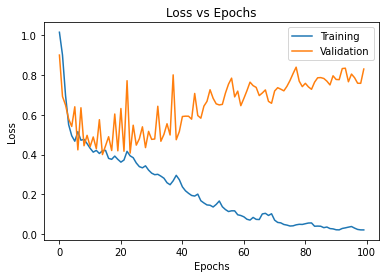

In [14]:
#### Plot the learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

### Model Regularization

In [15]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [16]:
def get_regularized_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd),activation='relu'),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [17]:
model = get_regularized_model(1e-5, 0.3)

In [18]:
model.compile(optimizer='adam', loss='mse', metrics = ['mae'])

In [19]:
history = model.fit(X_train, y_train, validation_split= 0.15, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
6/6 [==============================] - 0s 27ms/step - loss: 1.0381 - mae: 0.8748 - val_loss: 0.9738 - val_mae: 0.8291
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0209 - mae: 0.8672 - val_loss: 0.9279 - val_mae: 0.8075
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9671 - mae: 0.8454 - val_loss: 0.7952 - val_mae: 0.7480
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.8334 - mae: 0.7847 - val_loss: 0.5907 - val_mae: 0.6320
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6708 - mae: 0.6725 - val_loss: 0.6008 - val_mae: 0.5878
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6244 - mae: 0.6162 - val_loss: 0.5131 - val_mae: 0.5526
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5296 - mae: 0.5724 - val_loss: 0.5500 - val_mae: 0.5781
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 0.5051 - mae: 0.5653 - va

6/6 [==============================] - 0s 4ms/step - loss: 0.4328 - mae: 0.5238 - val_loss: 0.4683 - val_mae: 0.5453
Epoch 65/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4082 - mae: 0.5075 - val_loss: 0.4373 - val_mae: 0.5204
Epoch 66/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4161 - mae: 0.5062 - val_loss: 0.4386 - val_mae: 0.5204
Epoch 67/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4001 - mae: 0.5070 - val_loss: 0.4652 - val_mae: 0.5333
Epoch 68/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4082 - mae: 0.4986 - val_loss: 0.4566 - val_mae: 0.5327
Epoch 69/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4040 - mae: 0.4975 - val_loss: 0.4595 - val_mae: 0.5346
Epoch 70/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4048 - mae: 0.4973 - val_loss: 0.4615 - val_mae: 0.5403
Epoch 71/100
6/6 [==============================] - 0s 4ms/step - loss: 0.3933 - mae: 0.4932 - val_loss

In [20]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 2ms/step - loss: 0.6452 - mae: 0.6663


[0.6451937556266785, 0.6662508249282837]

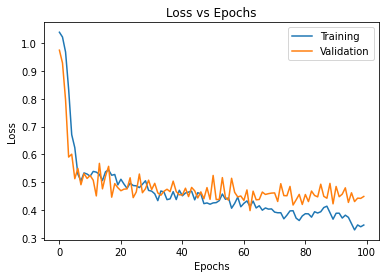

In [21]:
#### Plot the learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

In [22]:
import warnings
warnings.filterwarnings('ignore')

In [23]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [24]:
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, T-Cells (a type of white blood cells)
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, thyroid stimulating hormone
      - s5      ltg, lamotrigine
      - s6      glu, blood sugar level

Note: Each of these 10 feature va

In [25]:
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])


In [26]:
data = diabetes_dataset['data']
target = diabetes_dataset['target']

In [27]:
# Normalize the target data (this will make clearer training curves)
target = (target - target.mean(axis=0)) / target.std()
target

array([-1.47194752e-02, -1.00165882e+00, -1.44579915e-01,  6.99512942e-01,
       -2.22496178e-01, -7.15965848e-01, -1.83538046e-01, -1.15749134e+00,
       -5.47147277e-01,  2.05006151e+00, -6.64021672e-01, -1.07957508e+00,
        3.48889755e-01,  4.26806019e-01, -4.43258925e-01,  2.45001404e-01,
        1.80071184e-01, -1.05621783e-01, -7.15965848e-01,  2.06043272e-01,
       -1.09256112e+00, -1.33929596e+00, -1.09256112e+00,  1.20596866e+00,
        4.13819975e-01,  6.47568766e-01, -1.96524090e-01, -8.71798376e-01,
       -2.74440354e-01,  1.69943833e+00, -3.00412442e-01, -1.20943552e+00,
        2.45262887e+00, -8.45826288e-01, -1.13151925e+00, -6.51035629e-01,
        1.46568953e+00,  1.60853602e+00,  1.29687096e+00, -8.06868156e-01,
       -6.77007716e-01, -1.26137969e+00, -1.18346343e+00, -7.80896068e-01,
        1.38777327e+00, -1.28735178e+00,  4.91736239e-01, -1.31593871e-01,
       -1.00165882e+00, -1.31593871e-01,  3.72247006e-02,  9.46247777e-01,
       -1.20943552e+00, -

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.1)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(397, 10)
(45, 10)
(397,)
(45,)


### Train a Feedforward Neural Network Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

def get_model():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1)
    ])
    return model

In [30]:
model = get_model()

In [31]:
# Print the Model Summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_14 (Dense)             (None, 128)               1408      
_________________________________________________________________
dense_15 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_16 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_17 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_18 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_19 (Dense)             (None, 128)               16512     
_________________________________________________________________
dense_20 (Dense)             (None, 1)                

In [32]:
# Compile the Model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [33]:
# Train the Model, with some of the data reserved for validation
history = model.fit(X_train, y_train, epochs=100, validation_split=0.15, batch_size=64, verbose=2)

Epoch 1/100
6/6 - 0s - loss: 0.9956 - mae: 0.8528 - val_loss: 0.9132 - val_mae: 0.8235
Epoch 2/100
6/6 - 0s - loss: 0.9208 - mae: 0.8196 - val_loss: 0.7500 - val_mae: 0.7530
Epoch 3/100
6/6 - 0s - loss: 0.7276 - mae: 0.7328 - val_loss: 0.4791 - val_mae: 0.6028
Epoch 4/100
6/6 - 0s - loss: 0.5495 - mae: 0.6006 - val_loss: 0.5618 - val_mae: 0.5856
Epoch 5/100
6/6 - 0s - loss: 0.5124 - mae: 0.5670 - val_loss: 0.4525 - val_mae: 0.5451
Epoch 6/100
6/6 - 0s - loss: 0.4769 - mae: 0.5629 - val_loss: 0.4562 - val_mae: 0.5521
Epoch 7/100
6/6 - 0s - loss: 0.4823 - mae: 0.5665 - val_loss: 0.4551 - val_mae: 0.5348
Epoch 8/100
6/6 - 0s - loss: 0.4604 - mae: 0.5449 - val_loss: 0.4485 - val_mae: 0.5353
Epoch 9/100
6/6 - 0s - loss: 0.4537 - mae: 0.5414 - val_loss: 0.4377 - val_mae: 0.5308
Epoch 10/100
6/6 - 0s - loss: 0.4514 - mae: 0.5452 - val_loss: 0.4465 - val_mae: 0.5351
Epoch 11/100
6/6 - 0s - loss: 0.4432 - mae: 0.5276 - val_loss: 0.4789 - val_mae: 0.5525
Epoch 12/100
6/6 - 0s - loss: 0.4476 - ma

Epoch 95/100
6/6 - 0s - loss: 0.0851 - mae: 0.2268 - val_loss: 0.8466 - val_mae: 0.6892
Epoch 96/100
6/6 - 0s - loss: 0.0738 - mae: 0.2048 - val_loss: 0.8062 - val_mae: 0.6829
Epoch 97/100
6/6 - 0s - loss: 0.0583 - mae: 0.1834 - val_loss: 0.8494 - val_mae: 0.6969
Epoch 98/100
6/6 - 0s - loss: 0.0643 - mae: 0.1947 - val_loss: 0.8733 - val_mae: 0.7170
Epoch 99/100
6/6 - 0s - loss: 0.0527 - mae: 0.1833 - val_loss: 0.8812 - val_mae: 0.7267
Epoch 100/100
6/6 - 0s - loss: 0.0427 - mae: 0.1533 - val_loss: 0.7848 - val_mae: 0.6685


In [34]:
# Evaluate the model on the test set
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.5172 - mae: 0.5562


[0.5171864628791809, 0.5562112331390381]

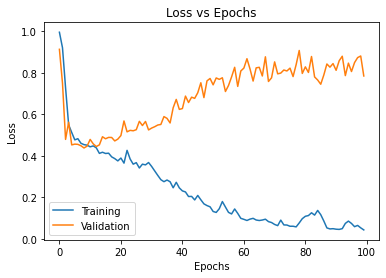

In [35]:
#### Plot the learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

### Model Regularization

In [36]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [37]:
def get_regularized_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation='relu', input_shape=(X_train.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd), activation='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer= regularizers.l2(wd),activation='relu'),
        Dropout(rate),
        Dense(1)
    ])
    return model

In [38]:
model = get_regularized_model(1e-5, 0.3)

In [39]:
model.compile(optimizer='adam', loss='mse', metrics = ['mae'])

In [40]:
history = model.fit(X_train, y_train, validation_split= 0.15, epochs=100, batch_size=64, verbose=1)

Epoch 1/100
6/6 [==============================] - 0s 27ms/step - loss: 1.0076 - mae: 0.8571 - val_loss: 0.9672 - val_mae: 0.8439
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.9944 - mae: 0.8538 - val_loss: 0.9356 - val_mae: 0.8311
Epoch 3/100
6/6 [==============================] - 0s 4ms/step - loss: 0.9672 - mae: 0.8474 - val_loss: 0.8575 - val_mae: 0.7976
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.8780 - mae: 0.8141 - val_loss: 0.7198 - val_mae: 0.7304
Epoch 5/100
6/6 [==============================] - 0s 4ms/step - loss: 0.7826 - mae: 0.7632 - val_loss: 0.6161 - val_mae: 0.6873
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6364 - mae: 0.6686 - val_loss: 0.5968 - val_mae: 0.6655
Epoch 7/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6332 - mae: 0.6585 - val_loss: 0.5157 - val_mae: 0.6155
Epoch 8/100
6/6 [==============================] - 0s 4ms/step - loss: 0.6530 - mae: 0.6503 - va

6/6 [==============================] - 0s 5ms/step - loss: 0.4308 - mae: 0.5252 - val_loss: 0.5278 - val_mae: 0.5661
Epoch 65/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4712 - mae: 0.5344 - val_loss: 0.5194 - val_mae: 0.5661
Epoch 66/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4154 - mae: 0.5075 - val_loss: 0.5113 - val_mae: 0.5619
Epoch 67/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4363 - mae: 0.5289 - val_loss: 0.5239 - val_mae: 0.5719
Epoch 68/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4338 - mae: 0.5178 - val_loss: 0.5564 - val_mae: 0.5907
Epoch 69/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4500 - mae: 0.5266 - val_loss: 0.5345 - val_mae: 0.5959
Epoch 70/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4265 - mae: 0.5224 - val_loss: 0.5299 - val_mae: 0.5826
Epoch 71/100
6/6 [==============================] - 0s 4ms/step - loss: 0.4074 - mae: 0.5023 - val_loss

In [41]:
model.evaluate(X_test, y_test)

2/2 [==============================] - 0s 1ms/step - loss: 0.4866 - mae: 0.5778


[0.4865849018096924, 0.5778027176856995]

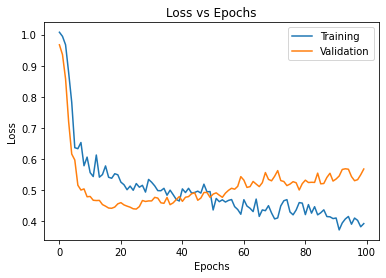

In [42]:
#### Plot the learning curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs Epochs')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Training', 'Validation'], loc='best')
plt.show()

#### Batch Normalisation Layers

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D, BatchNormalization, Dropout

In [45]:
# Build the Model

model = Sequential([
    Dense(64, input_shape=(X_train.shape[1],), activation='relu'),
    BatchNormalization(),
    Dropout(0.5),
    BatchNormalization(),
    Dropout(0.5),
    Dense(256, activation='relu')
])

In [46]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 64)                704       
_________________________________________________________________
batch_normalization (BatchNo (None, 64)                256       
_________________________________________________________________
dropout_12 (Dropout)         (None, 64)                0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 64)                256       
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
dense_29 (Dense)             (None, 256)               16640     
Total params: 17,856
Trainable params: 17,600
Non-trainable params: 256
________________________________________________

In [48]:
model.add(tf.keras.layers.BatchNormalization(
    momentum=0.95, 
    epsilon=0.005,
    axis = -1,
    beta_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=0.05), 
    gamma_initializer=tf.keras.initializers.Constant(value=0.9)
))

In [49]:
model.add(Dense(1))

In [50]:
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [52]:
history = model.fit(X_train, y_train, epochs=100, validation_split=0.15, batch_size=64,verbose=False)

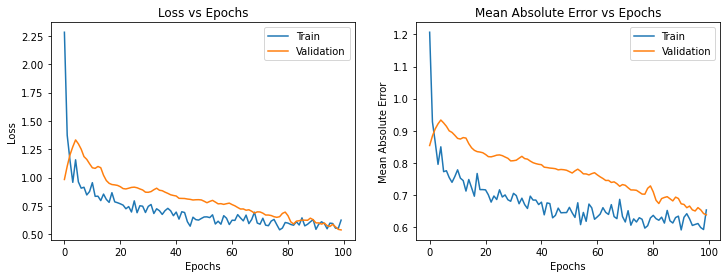

In [53]:
# Plot the learning curves

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

frame = pd.DataFrame(history.history)
epochs = np.arange(len(frame))

fig = plt.figure(figsize=(12,4))

# Loss plot
ax = fig.add_subplot(121)
ax.plot(epochs, frame['loss'], label="Train")
ax.plot(epochs, frame['val_loss'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Loss")
ax.set_title("Loss vs Epochs")
ax.legend()

# Accuracy plot
ax = fig.add_subplot(122)
ax.plot(epochs, frame['mae'], label="Train")
ax.plot(epochs, frame['val_mae'], label="Validation")
ax.set_xlabel("Epochs")
ax.set_ylabel("Mean Absolute Error")
ax.set_title("Mean Absolute Error vs Epochs")
ax.legend()